Measurement of drift, diffusion, and spurious drift. 

Simulate long trajectories of a freely diffusing Brownian particle confined to a segment with constant diffusion (as in exercise 7.2) and with multiplicative noise (as in exercise 7.3).

a) In each case, calculate the drift using equation $$C(L_{k},\,\Delta L,\,n)=\frac{1}{n\Delta t}\langle x_{j+n}-x_{j}\rangle$$. Compare your results with figures 7.4(a) and 7.4(d).

In [30]:
# Freely diffusing Brownian particle 

import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

A = 7
steps = 10**A        # Number of iterations 
N = 1
x = np.zeros((1,N))          # Pre allocation of the positions
L = 100
dt = 0.01
dtt = np.sqrt(dt)
results = np.zeros((5,N))
counter = 0
xPosition = np.zeros((N,steps))

for i in trange(steps):
    x = x + np.random.choice([-dtt, dtt], size=(1,N))
    x = np.where(x > L/2, L-x, x)
    x = np.where(x < -L/2, -L-x, x) 
    xPosition[:,i] = x
    

100%|██████████| 10000000/10000000 [02:19<00:00, 71826.45it/s]


In [31]:
#DRIFT
nDrift = 5
numberOfIntervals = 50
L = 100
centerL = L/numberOfIntervals # = 2
intervalCenters = np.linspace(0, (numberOfIntervals-1)*centerL, numberOfIntervals) + centerL/2 - L/2

drift = np.zeros(numberOfIntervals)
driftCounter = np.ones(numberOfIntervals)

for particle in trange(N):
    for time in range(steps-nDrift):
        intervallIndex = np.where(np.abs(xPosition[particle,time] - intervalCenters) <= centerL/2)

        driftDifference = xPosition[particle,time+nDrift] - xPosition[particle,time]
    
        drift[intervallIndex] += driftDifference
        
        if driftDifference != 0:
            driftCounter[intervallIndex] += 1

averageDrift = drift/driftCounter
driftCoefficient = averageDrift/(dt * nDrift)

100%|██████████| 1/1 [00:42<00:00, 42.05s/it]


(-0.1, 0.1)

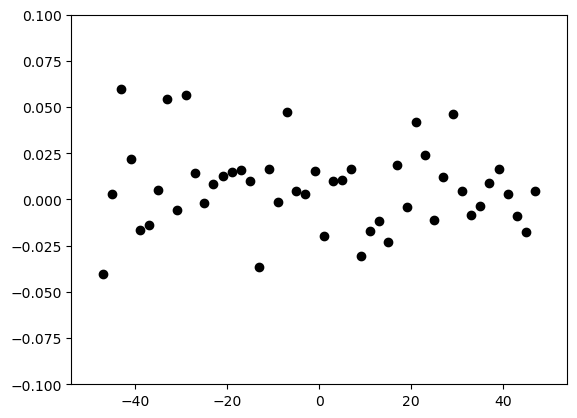

In [32]:
plt.plot(intervalCenters,driftCoefficient,'ko')
plt.ylim([-0.1,0.1])

In [33]:
#DIFFUSION
nDiff = 1
numberOfIntervals = 50
L = 100
centerL = L/numberOfIntervals # = 2
intervalCenters = np.linspace(0, (numberOfIntervals-1)*centerL, numberOfIntervals) + centerL/2 - L/2

diff = np.zeros(numberOfIntervals)
diffCounter = np.ones(numberOfIntervals)

for particle in trange(N):
    for time in range(steps-nDiff):
        intervallIndex = np.where(np.abs(xPosition[particle,time] - intervalCenters) <= centerL/2)

        diffDifference = (xPosition[particle,time+nDiff] - xPosition[particle,time])**2
    
        diff[intervallIndex] += diffDifference
        
        if diffDifference != 0:
            diffCounter[intervallIndex] += 1

averageDiff = diff/diffCounter
diffCoefficient = averageDiff/(dt * nDiff * 2)

100%|██████████| 1/1 [00:42<00:00, 42.49s/it]


(0.0, 2.0)

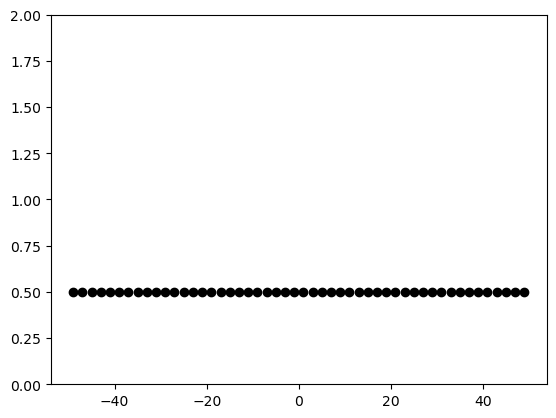

In [34]:
plt.plot(intervalCenters,diffCoefficient,'ko')
plt.ylim([0,2])

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

A = 7
steps = 10**A           # Number of iterations 
N = 100
x = np.zeros((1,N))          # Pre allocation of the positions
#x = np.random.uniform(low=-L/2,high=L/2,size=(1,N))
L = 100

# from multiplicative noise
sigma0 = 1
sigma = 1.8
beta = sigma/L
dt = 0.01
dtt = np.sqrt(dt)
results = np.zeros((5,N))

# for noise induced drift
alpha = 0.5
f1 = dt*alpha*sigma0*sigma/L
f2 = dt*alpha*sigma*sigma/(L*L)

xPositionMult = np.zeros((N,steps))

counter = 0
for i in trange(steps):
    x = x + f1 + f2 * x + (sigma0 + beta * x) * np.random.choice([-dtt, dtt], size=(1,N))
    x = np.where(x > L, 2*L-x, x)
    x = np.where(x < -L, -2*L-x, x) 
    xPositionMult[:,i] = x      
         

100%|██████████| 10000000/10000000 [02:34<00:00, 64850.21it/s]


In [36]:
#DRIFT
nDrift = 5
numberOfIntervals = 50
L = 100
centerL = L/numberOfIntervals # = 2
intervalCenters = np.linspace(0, (numberOfIntervals-1)*centerL, numberOfIntervals) + centerL/2 - L/2

drift = np.zeros(numberOfIntervals)
driftCounter = np.ones(numberOfIntervals)

for particle in trange(N):
    for time in range(steps-nDrift):
        intervallIndex = np.where(np.abs(xPositionMult[particle,time] - intervalCenters) <= centerL/2)

        driftDifference = xPositionMult[particle,time+nDrift] - xPositionMult[particle,time]
    
        drift[intervallIndex] += driftDifference
        
        if driftDifference != 0:
            driftCounter[intervallIndex] += 1

averageDrift = drift/driftCounter
driftCoefficientMult = averageDrift/(dt * nDrift)

100%|██████████| 100/100 [1:03:15<00:00, 37.95s/it]


(-0.1, 0.1)

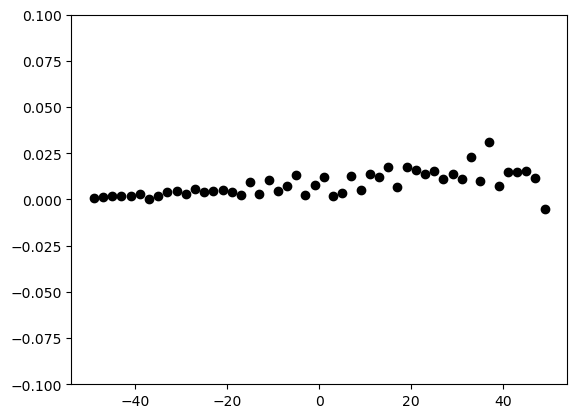

In [37]:
plt.plot(intervalCenters,driftCoefficientMult,'ko')
plt.ylim([-0.1,0.1])

In [38]:
#DIFFUSION
nDiff = 1
numberOfIntervals = 50
L = 100
centerL = L/numberOfIntervals # = 2
intervalCenters = np.linspace(0, (numberOfIntervals-1)*centerL, numberOfIntervals) + centerL/2 - L/2

diff = np.zeros(numberOfIntervals)
diffCounter = np.ones(numberOfIntervals)

for particle in trange(N):
    for time in range(steps-nDiff-1):
        intervallIndex = np.where(np.abs(xPositionMult[particle,time] - intervalCenters) <= centerL/2)

        diffDifference = (xPositionMult[particle,time+nDiff] - xPositionMult[particle,time])**2
    
        diff[intervallIndex] += diffDifference
        
        if diffDifference != 0:
            diffCounter[intervallIndex] += 1

averageDiff = diff/diffCounter
diffCoefficientMult = averageDiff/(dt * nDiff * 2)

100%|██████████| 100/100 [1:04:26<00:00, 38.67s/it]


(0.0, 2.0)

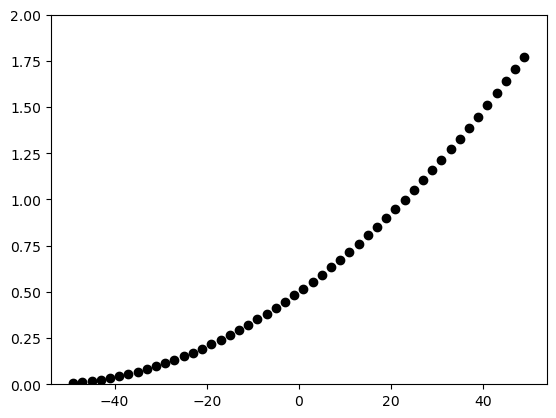

In [39]:
plt.plot(intervalCenters,diffCoefficientMult,'ko')
plt.ylim([0,2])

c) From the numerical diffusion, calculate the noise-induced drift. Compare your results with figures 7.4(c) and 7.4f.

(-0.1, 0.1)

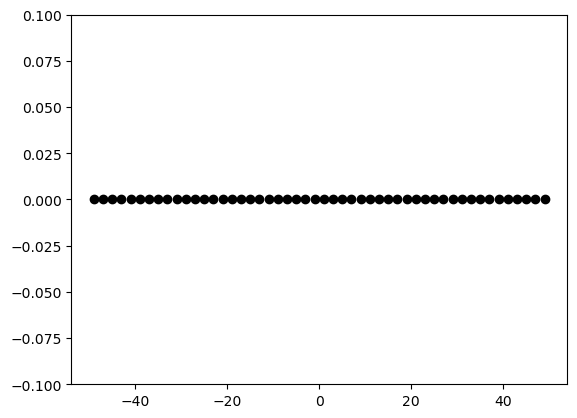

In [40]:
derivative = np.zeros(len(diffCoefficient))
for i in range(1, len(diffCoefficient)):
    derivative[i] = (diffCoefficient[i] - diffCoefficient[i-1]) / centerL

plt.plot(intervalCenters,derivative,'ko')
plt.ylim([-0.1,0.1])

(-0.1, 0.1)

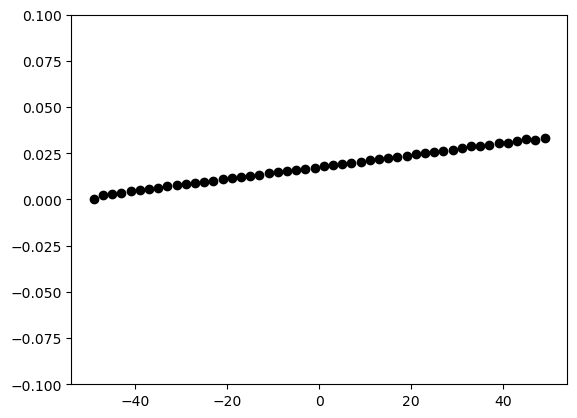

In [41]:
derivative2 = np.zeros(len(diffCoefficientMult))
for i in range(1, len(diffCoefficientMult)):
    derivative2[i] = (diffCoefficientMult[i] - diffCoefficientMult[i-1]) / centerL

plt.plot(intervalCenters,derivative2,'ko')
plt.ylim([-0.1,0.1])

Complete Plot

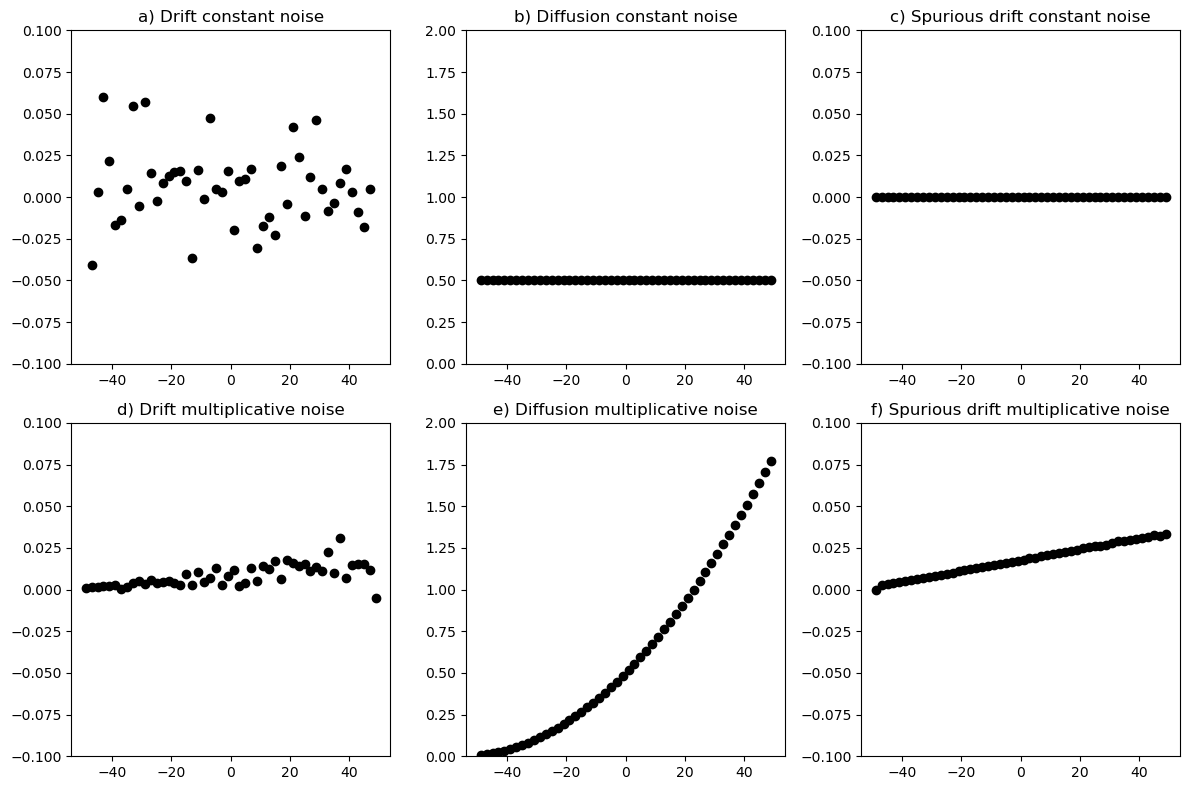

In [42]:
plt.figure(figsize=(12, 8))

# Create a 2x3 grid of subplots
plt.subplot(2, 3, 1)  
plt.plot(intervalCenters, driftCoefficient, 'ko')
plt.ylim([-0.1, 0.1])
plt.title('a) Drift constant noise')

plt.subplot(2, 3, 2)  
plt.plot(intervalCenters, diffCoefficient, 'ko')
plt.ylim([0, 2])
plt.title('b) Diffusion constant noise')

plt.subplot(2, 3, 4) 
plt.plot(intervalCenters, driftCoefficientMult, 'ko')
plt.ylim([-0.1, 0.1])
plt.title('d) Drift multiplicative noise')

plt.subplot(2, 3, 5) 
plt.plot(intervalCenters, diffCoefficientMult, 'ko')
plt.ylim([0, 2])
plt.title('e) Diffusion multiplicative noise')

plt.subplot(2, 3, 3)
plt.plot(intervalCenters,derivative,'ko')
plt.ylim([-0.1, 0.1])
plt.title('c) Spurious drift constant noise')

plt.subplot(2, 3, 6) 
plt.plot(intervalCenters, derivative2, 'ko')
plt.ylim([-0.1, 0.1])
plt.title('f) Spurious drift multiplicative noise')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()


d) Do you find any differences in the drifts calculated for trajectories without and with multiplicative noise?